In [33]:
# import packages

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [32]:
# Define graph-making function (credit: IBM's Data Science certificate)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [29]:
# Create ticker object for Zoom stock

zoom = yf.Ticker("ZM")

In [31]:
# Extract stock information for the maximum period of time, and store it in a dataframe

zoom_data = zoom.history(period="max")

In [34]:
# Reset the index and display top 5 rows

zoom_data.reset_index(inplace=True)

zoom_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-04-18 00:00:00-04:00,65.000000,66.000000,60.320999,62.000000,25764700,0.0,0.0
1,2019-04-22 00:00:00-04:00,61.000000,68.900002,59.939999,65.699997,9949700,0.0,0.0
2,2019-04-23 00:00:00-04:00,66.870003,74.168999,65.550003,69.000000,6786500,0.0,0.0
3,2019-04-24 00:00:00-04:00,71.400002,71.500000,63.160000,63.200001,4973500,0.0,0.0
4,2019-04-25 00:00:00-04:00,64.739998,66.849998,62.599998,65.000000,3863300,0.0,0.0


In [35]:
# Download webpage with Zoom data using request library & save text response as web_data

url = "https://www.macrotrends.net/stocks/charts/ZM/zoom-video-communications/revenue"

web_data = requests.get(url).text

In [36]:
# Parse web data with BS

soup = BeautifulSoup(web_data, 'html5lib')

In [39]:
# Create a dataframe with columns 'Date' and 'Revenue' 

zoom_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the table on the page and iterate through each row to obtain the date & revenue info
for row in (soup.find_all("tbody"))[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Append the data of each row to the table
    zoom_revenue = zoom_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)  

# Remove $ and comma from revenue
zoom_revenue["Revenue"] = zoom_revenue['Revenue'].str.replace(',|\$',"")

# Convert revenue from string to float value for graphing
zoom_revenue['Revenue'] = pd.to_numeric(zoom_revenue['Revenue'])

zoom_revenue

C:\Users\sophi\AppData\Local\Temp\ipykernel_18012\3579555513.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sophi\AppData\Local\Temp\ipykernel_18012\3579555513.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sophi\AppData\Local\Temp\ipykernel_18012\3579555513.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sophi\AppData\Local\Temp\ipykernel_18012\3579555513.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sophi\AppData\Local\Temp\ipykernel_18012\3579555513.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

,Date,Revenue
0,2022-10-31,1102.0
1,2022-07-31,1099.0
2,2022-04-30,1074.0
3,2022-01-31,1071.0
4,2021-10-31,1051.0
5,2021-07-31,1021.0
6,2021-04-30,956.0
7,2021-01-31,882.0
8,2020-10-31,777.0
9,2020-07-31,664.0


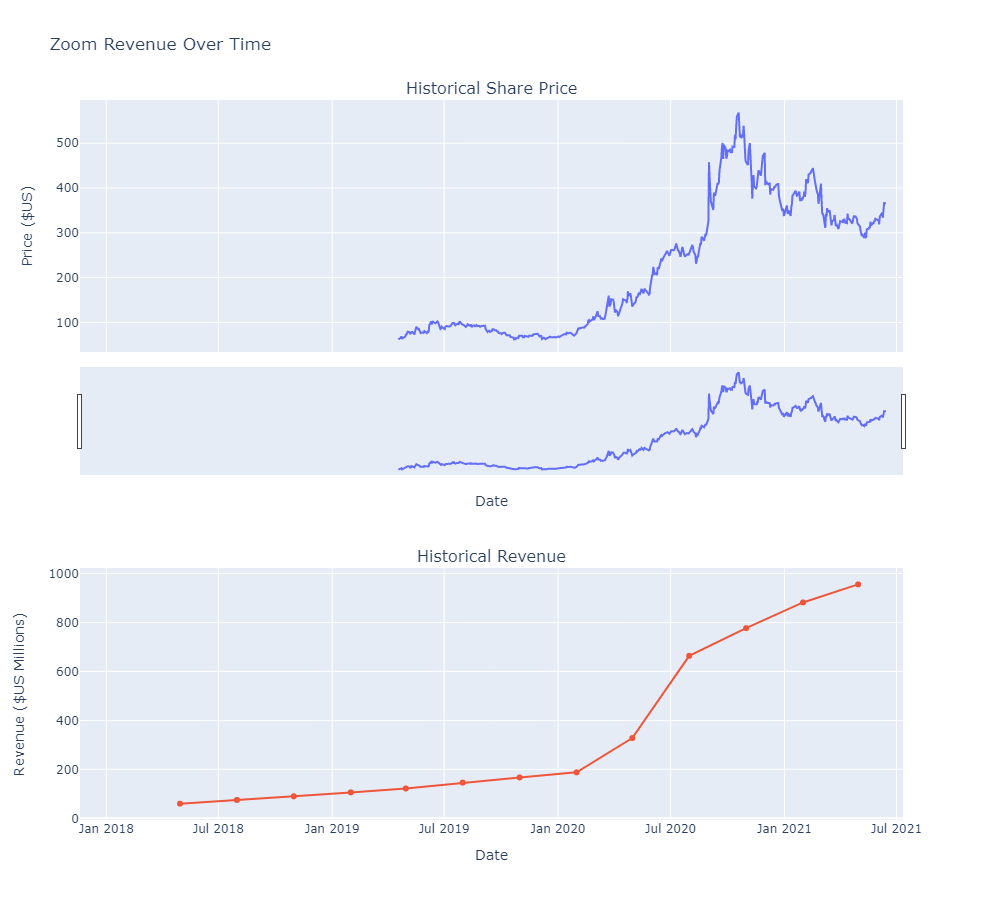

In [40]:
# Create visualization of the change in Zoom revenue/share price over time

make_graph(zoom_data, zoom_revenue, 'Zoom Revenue Over Time')

# Analysis of Graphs


### Historical Share Price

From the first data point depicted around April of 2019 up until late February 2020, the share price of Zoom stock remained relatively stable - remaining under 100 and fluctuating only mildly. Following February 2020, as the COVID-19 pandemic began, so did the rise in Zoom share price. Zoom share prices continued to increase relatively stable throughout 2020 until its peak in October of 2020 at $568.34/share, an astounding 817% increase from the first data point in 2019. Since October 2020, share prices have continued to decrease on average. 

### Historical Revenue

The revenue from Zoom has increased continuously since April of 2018. These increases were linear and stable from 2018 until early 2020 - similar to the historic share prices. The year 2020 brought on a rapid spike in revenues from Zoom, and unlike the share prices these increases have remained stable. From the end of January 2020 to April 2021, Zoom revenue has skyrocketed up about 409%. 